# Homework 1

## Question 1

### Part a

(<matplotlib.image.AxesImage at 0x25567b60f28>,
 <matplotlib.text.Text at 0x2556780b208>)

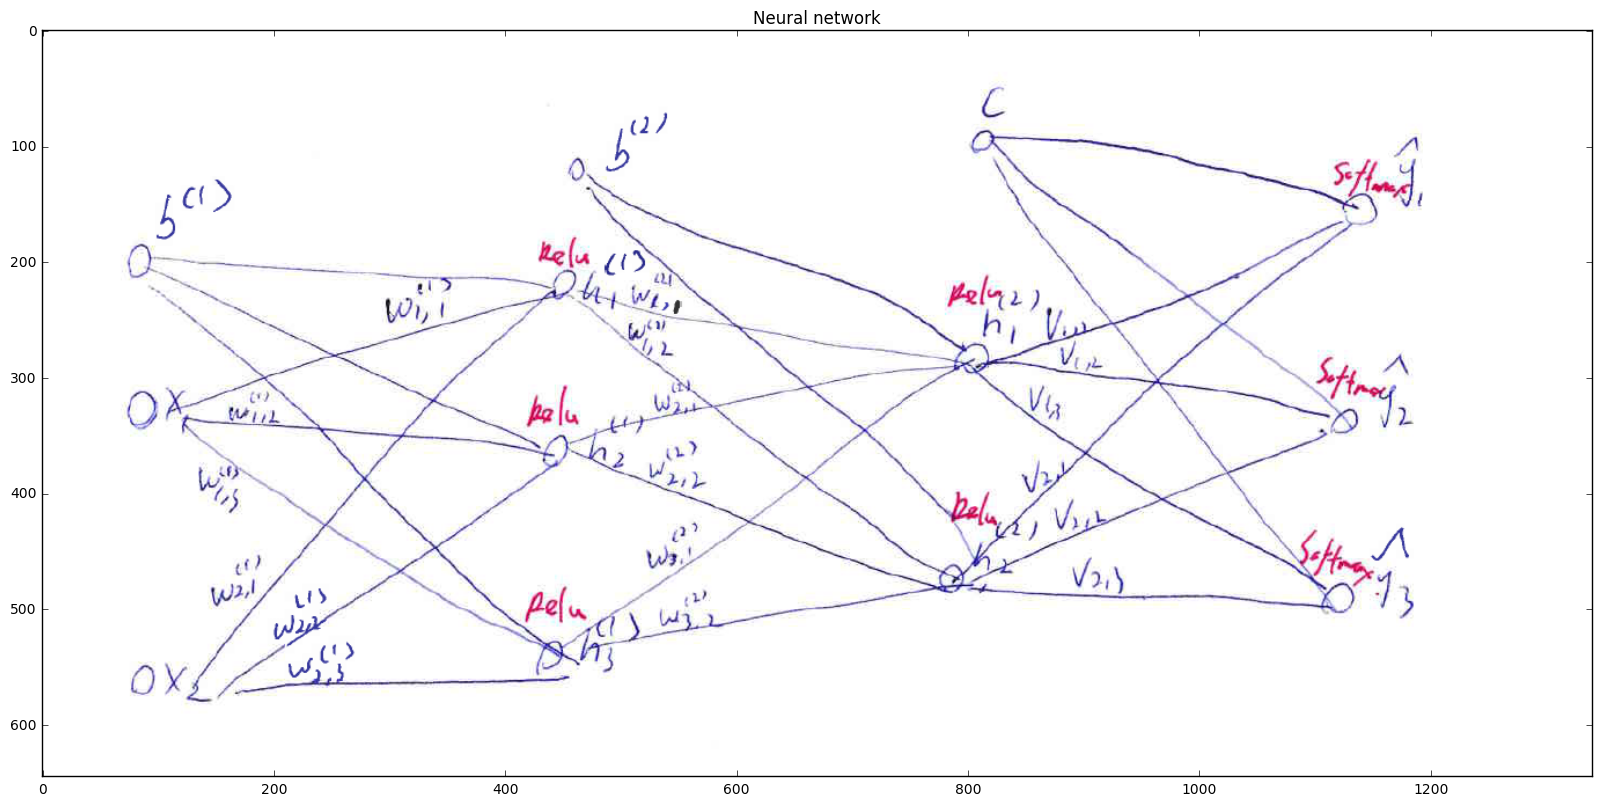

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
img=mpimg.imread("C:/Users/yipinl/590/Capture.PNG")
plt.figure(figsize = (20,15))
plt.imshow(img),plt.title('Neural network')

### Part b

Accodinng to this graph, the 

(1) The first layer

$h^{(1)}_1 = Relu(a^{(1)}_1) = Relu(x_1W^{(1)}_{1,1}+x_2W^{(1)}_{2,1}+b^{(1)})$

$h^{(1)}_2 = Relu(a^{(1)}_2) = Relu(x_1W^{(1)}_{1,2}+x_2W^{(1)}_{2,2}+b^{(1)})$

$h^{(1)}_3 = Relu(a^{(1)}_3) = Relu(x_1W^{(1)}_{1,3}+x_2W^{(1)}_{2,3}+b^{(1)})$

(2) The second layer:

$h^{(2)}_1 = Relu(a^{(2)}_1) = Relu(h^{(1)}_1W^{(2)}_{1,1}+h^{(1)}_2W^{(2)}_{2,1}+h^{(1)}_3W^{(2)}_{3,1} + b^{(2)})$

$h^{(2)}_2 = Relu(a^{(2)}_2) = Relu(h^{(1)}_1W^{(2)}_{1,2}+h^{(1)}_2W^{(2)}_{2,2}+h^{(1)}_3W^{(2)}_{3,2} + b^{(2)})$

(3) The output:

$\hat y_1 = Softmax(h^{(2)}_1V_{1,1}+h^{(2)}_1 V_{2,1} + c)$

$\hat y_2 = Softmax(h^{(2)}_1V_{1,2}+h^{(2)}_1 V_{2,2} + c)$

$\hat y_2 = Softmax(h^{(2)}_1V_{1,3}+h^{(2)}_1 V_{2,3} + c)$

### Part c

In [2]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
from __future__ import division
import random

In [3]:
#######################
#   Helper functions  #
#######################
# Linear activation
def a(x,w,b):
    a_out = x.dot(w) + b
    return a_out

sigmoid = lambda x: 1/(1+np.exp(-x))
relu = np.vectorize(lambda x: np.fmax(0,x))
softmax = lambda x: np.exp(x)/(np.exp(x).sum(axis=1, keepdims=True))

# Logistic unit
def logistic(x,w,b):
    s = sigmoid(a(x,w,b))
    y = np.round(s)
    return np.array([y,s]).T

In [4]:
def ff_nn_2_ReLu(x, w_1, w_2, v, b_1, b_2):
    '''
    A simple 2 layer neural network with relu activation and binary output.
    '''
    h1 = relu(a(x,w_1,b_1))
    h2 = relu(a(h1,w_2,b_2))
    o = softmax(a(h2,v,c))

    return np.round(o,3)


### Part d

In [5]:
w_1 = np.array([[1,0],[-1,0],[0,0.5]])
w_2 = np.array([[1,0,0],[-1,-1,0]])
v = np.array([[1,1],[0,0],[-1,-1]])
x = np.array([[1,1,1],[-1,-1,1]])
b_1 = np.array([0,0,1])
b_2 = np.array([1,-1])
c = np.array([1,0,0])

print(ff_nn_2_ReLu(x.T, w_1.T, w_2.T, v.T, b_1, b_2))

[[ 0.946  0.047  0.006]
 [ 0.946  0.047  0.006]
 [ 0.946  0.047  0.006]]


## Question 2

### Part a

$\partial_xf(x,y) = -2(1-x)+100\times2(y-x^2)(-2x) = 400x^3-400xy+2x-2$

$\partial_yf(x,y) = 100\times x(y-x^2) = 200y-200x^2$

### Part b

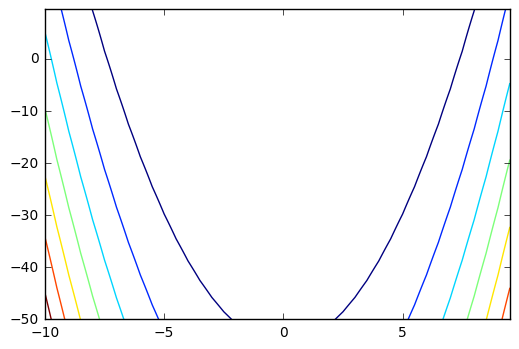

In [6]:
delta = 0.5
x = np.arange(-10.0,10.0, delta)
y = np.arange(-50, 10.0, delta)
X, Y = np.meshgrid(x, y)
Z = (1-X)**2 + 100*(Y - X**2)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

### Part c

In [7]:
# --- Defining gradient ----
def grad_f(vector):
    x, y = vector
    df_dx = -2+2*x-400*x*y+400*np.power(x,3)
    df_dy = 200*y-200*np.power(x,2)
    return np.array([df_dx, df_dy])

In [8]:
# --- Grad Descent ----
def grad_descent(starting_point=None, iterations=50, learning_rate=0.0001):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-10,10,size=2)
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

#### Case 1: Learning rate = 0.000001

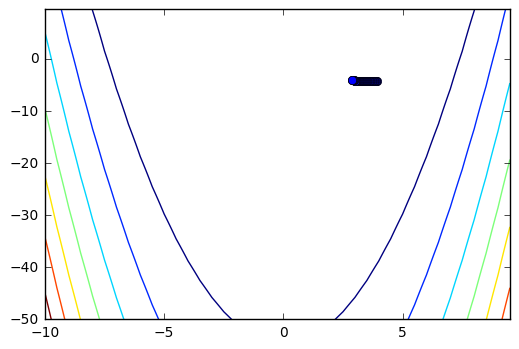

In [9]:
# --- Visualize Trajectory ---
np.random.seed(123)
traj = grad_descent(iterations=50, learning_rate=10**-6)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

#### Case 2: Learning rate = 0.00001

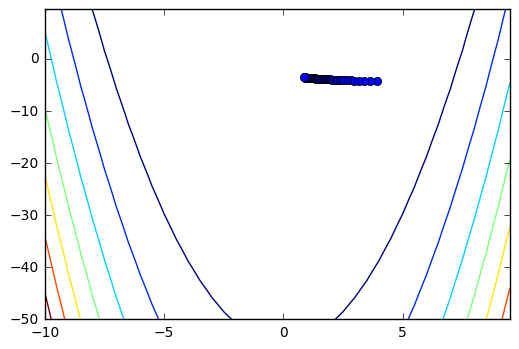

In [10]:
# --- Visualize Trajectory ---
np.random.seed(123)
traj = grad_descent(iterations=50, learning_rate=10**-5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

#### Case 3: Learning rate = 0.0001

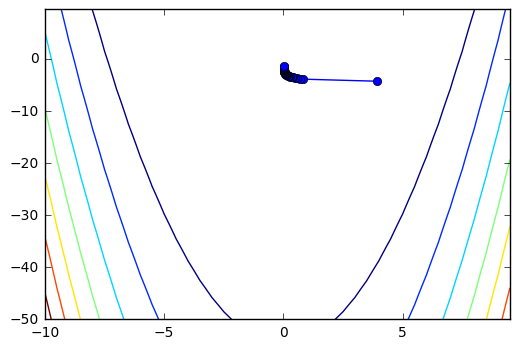

In [11]:
# --- Visualize Trajectory ---
np.random.seed(123)
traj = grad_descent(iterations=50, learning_rate=0.0001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

#### Case 4: Learning rate = 0.0002

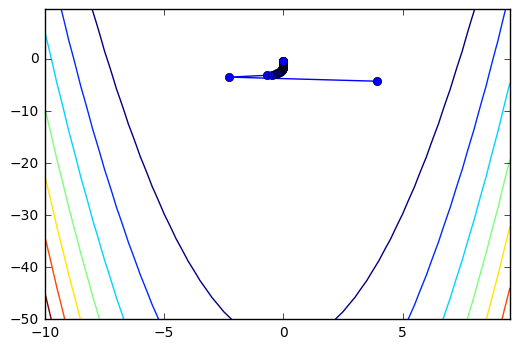

In [12]:
# --- Visualize Trajectory ---
np.random.seed(123)
traj = grad_descent(iterations=50, learning_rate=0.0002)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

#### Case 5: Learning rate = 0.001

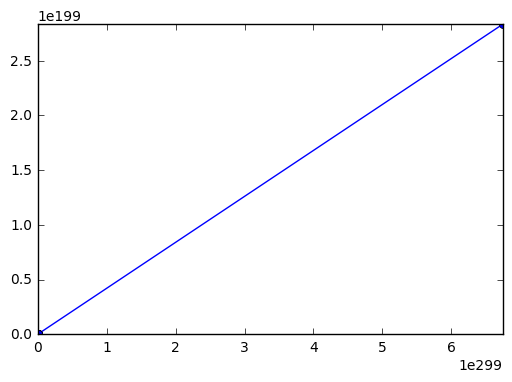

In [13]:
# --- Visualize Trajectory ---
np.random.seed(123)
traj = grad_descent(iterations=50, learning_rate=0.001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

Summary: 

In the case of learning rate is 0.000001 or 0.00001, the learning rate is too small to make the function reach the local minimizer. In the case of learning rate is 0.001, the learning rate is too large that the function cannot converge. Hence, in these cases, the learning rate 0.0001 is the best.

### Part d

In [14]:
def grad_descent_with_momentum(starting_point=None, iterations=50, alpha=.9, epsilon=0.0001):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-10,10,size=2)
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

#### Case 1: Alpha = 0.5, Epsilon = 0.00001

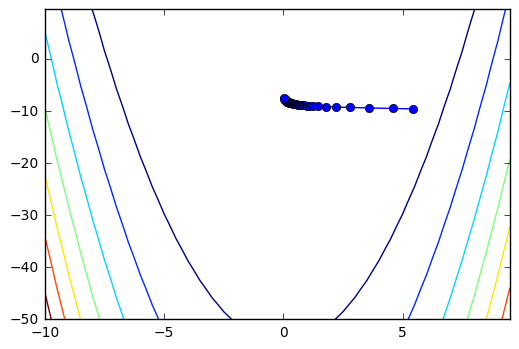

In [15]:
# --- Visualizing trajectory --
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=50, epsilon=0.00001, alpha=.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

#### Case 2: Alpha = 0.5, Epsilon = 0.0001

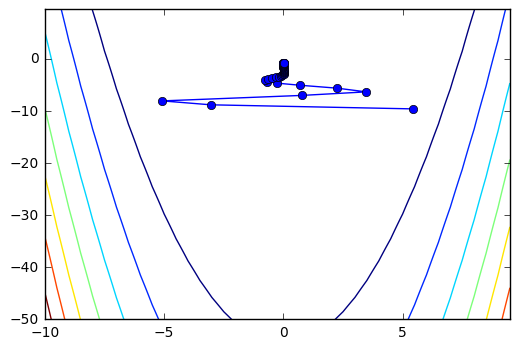

In [16]:
# --- Visualizing trajectory --
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=50, epsilon=0.0001, alpha=.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

#### Case 3: Alpha = 0.5, Epsilon = 0.001

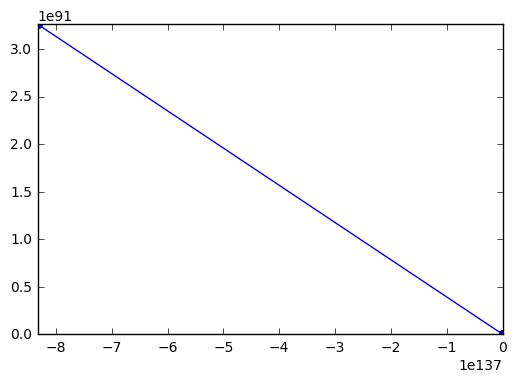

In [17]:
# --- Visualizing trajectory --
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=50, epsilon=0.001, alpha=.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

### Case 4: Alpha = 1, Epsilon = 0.00001

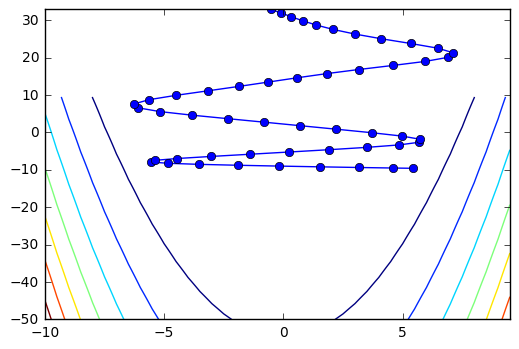

In [18]:
# --- Visualizing trajectory --
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=50, epsilon=0.00001, alpha=1)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

#### Case 5: Alpha = 0.7, Epsilon = 0.00001

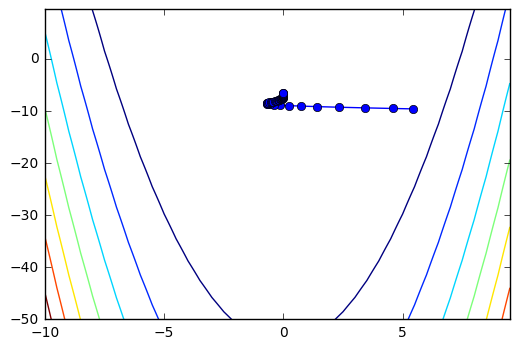

In [19]:
# --- Visualizing trajectory --
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=50, epsilon=0.00001, alpha=0.7)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

Summary:

When we fix alpha to be 0.5, if the epsilon is 0.001, the function cannot converge. If the epsilon is epsilon=0.0001, then we can show the function oscillates around the minimizer. When the epsilon is 0.00001, the function converges when it does not swing around the minimizer. Hence, it is the best value in this case.

Second, we fix epsilon to be 0.00001. When the alpha is 1, the function oscillates around the minimizer back and forth. When the alpha is 0.7, it swings a little. Hence, in this case, alpha = 0.5 is the best solution.

## Question 3

### Part a

$L(y,\hat y) = -(y_1\log(\hat y_1)+y_2log(\hat y_2)+y_3log(\hat y_3))$

$\frac{\partial L_s}{\partial V_{k,s}} = \frac{\partial L_s}{\partial \hat y_s} \frac{\partial \hat y_s}{\partial a^{(3)}_s} \frac{\partial a^{(3)}_s}{\partial V_{k,s}} =\frac{y_s-\hat y_s}{\hat y_s (1-\hat y_s)}\hat y_s (1-\hat y_s)h^{(2)}_k= (\prod(1= True \ class)-\hat y_s) h^{(2)}_k$

$\frac{\partial L_s}{\partial c} = \frac{\partial L_s}{\partial \hat y_s} \frac{\partial \hat y_s}{\partial a^{(3)}_s} \frac{\partial a^{(3)}_s}{\partial c} = (\prod(1= True \ class)-\hat y_s)$

$\frac{\partial L_s}{\partial W^{(2)}_{j,k}} = \frac{\partial L_s}{\partial \hat y_s} \frac{\partial \hat y_s}{\partial a^{(3)}_s} \frac{\partial a^{(3)}_s}{\partial h^{(2)}_k} \frac{\partial h^{(2)}_k}{\partial W^{(2)}_{j,k}} = (\prod(1= True \ class)-\hat y_s)  V_{k,s} \prod(a^{(2)}_k >0) h^{(1)}_j$

$\frac{\partial L_s}{\partial b^{(2)}} = \frac{\partial L_s}{\partial \hat y_s} \frac{\partial \hat y_s}{\partial a^{(3)}_s} \sum\limits_{k}\frac{\partial a^{(3)}_s}{\partial h^{(2)}_k} \frac{\partial h^{(2)}_k}{\partial b^{(2)}} = (\prod(1= True \ class)-\hat y_s) \sum\limits_k V_{k,s} \prod(a^{(2)}_k >0) $ 

$\frac{\partial L_s}{\partial W^{(1)}_{i,j}} = \frac{\partial L_s}{\partial \hat y_s} \frac{\partial \hat y_s}{\partial a^{(3)}_s} \sum\limits_k \frac{\partial a^{(3)}_s}{\partial h^{(2)}_k} \frac{\partial h^{(2)}_k}{\partial a^{(2)}_{k}} \frac{\partial a^{(2)}_{k}} {\partial h^{(1)}_{j}} \frac {\partial h^{(1)}_{j}} {\partial a^{(1)}_{j}} \frac {\partial a^{(1)}_{j}} {\partial W^{(1)}_{i,j}} = (\prod(1= True \ class)-\hat y_s) \sum\limits_k V_{k,s}\prod(a^{(2)}_k >0) W^{(2)}_{j,k}\prod(a^{(1)}_j > 0)x_i$

$\frac{\partial L_s}{\partial b^{(1)}} = \frac{\partial L_s}{\partial \hat y_s} \frac{\partial \hat y_s}{\partial a^{(3)}_s} \sum\limits_{k}\frac{\partial a^{(3)}_s}{\partial h^{(2)}_k} \frac{\partial h^{(2)}_k}{\partial a^{(2)}_{k}} \sum\limits_j \frac{\partial a^{(2)}_{k}} {\partial h^{(1)}_{j}} \frac {\partial h^{(1)}_{j}} {\partial a^{(1)}_{j}} \frac {\partial a^{(1)}_{j}} {\partial b^{(1)}} = (\prod(1= True \ class)-\hat y_s) \sum\limits_k V_{k,s}\prod(a^{(2)}_k >0) \sum\limits_j W^{(2)}_{j,k}\prod(a^{(1)}_j > 0) $ 



### Part b

In [20]:
def grad_f(X,h1,h2,Y,Y_hat,parameters):
    W1,b1,W2,b2,V,c = parameters
    dw1 = X.T.dot(((Y_hat - Y).dot(V.T)*(h2 > 0)).dot(W2.T)*(h1>0))
    db1 = (((Y_hat - Y).dot(V.T)*(h2 > 0)).dot(W2.T)*(h1>0)).sum(axis = 0)
    dw2 = h1.T.dot(((Y_hat - Y).dot(V.T)*(h2 > 0)))
    db2 = ((Y_hat - Y).dot(V.T)*(h2 > 0)).sum(axis = 0)
    dV = h2.T.dot((Y_hat - Y))
    dc = (Y_hat - Y).sum(axis = 0)
              
    return dw1, db1, dw2,  db2, dV, dc

### Part c

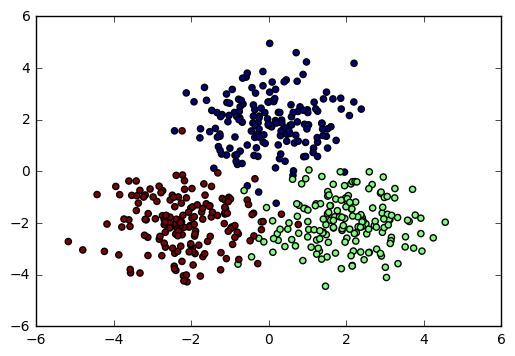

In [21]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#   Generate some training    #
#      data from a GMM        #
###############################
def gen_gmm_data(n = 999, plot=False):
    # Fixing seed for repeatability
    np.random.seed(123)
    
    # Parameters of a normal distribuion
    mean_1 = [0, 2] ; mean_2 = [2, -2] ; mean_3 = [-2, -2]
    mean = [mean_1, mean_2, mean_3] ; cov = [[1, 0], [0, 1]]  
    
    # Setting up the class probabilities
    n_samples = n
    pr_class_1 = pr_class_2 = pr_class_3 = 1/3.0
    n_class = (n_samples * np.array([pr_class_1,pr_class_2, pr_class_3])).astype(int)
  
    # Generate sample data
    for i in range(3):
        x1,x2 = np.random.multivariate_normal(mean[i], cov, n_class[i]).T
        if (i==0):
            xs = np.array([x1,x2])
            cl = np.array([n_class[i]*[i]])
        else: 
            xs_new = np.array([x1,x2])
            cl_new = np.array([n_class[i]*[i]])
            xs = np.concatenate((xs, xs_new), axis = 1)
            cl = np.concatenate((cl, cl_new), axis = 1)
    
    # Plot?
    if plot:
        plt.scatter(xs[:1,:],xs[1:,:], c = cl)

    # One hot encoding classes
    y = pd.Series(cl[0].tolist())
    y = pd.get_dummies(y).as_matrix() 

    # Normalizing data (prevents overflow errors)     
    mu = xs.mean(axis = 1)
    std = xs.std(axis = 1)
    xs = (xs.T - mu) / std
    
    return xs, y, cl
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#  Generate data for network    #
#################################
X, Y, cl = gen_gmm_data(n = 500,plot = True)

### Part d

In [25]:
def predict(Y_hat):
    return np.argmax(Y_hat, axis=1)

def error_rate(Y_hat, cl):
    prediction = predict(Y_hat)
    return np.mean(prediction != cl)

def cost(Y_hat, Y):
    tot = Y * np.log(Y_hat)
    return -tot.sum()

In [26]:
####################################
#   2 - Hidden Layer ReLU Network   #
####################################
def forward(X,parameters):
    # Unpacking parameters    
    W1,b1,W2,b2,V,c = parameters
    
    # Forward pass
    a1 = X.dot(W1) + b1
    H1 = relu(a1)
    a2 = H1.dot(W2) + b2
    H2 = relu(a2)
    a3 = H2.dot(V) + c
    Y_hat = softmax(a3)
    return H1,H2,Y_hat


In [27]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#   Parameter Update: Momentum + Regularization   #
###################################################
def parameter_update(parameters,  grads, 
                     momentum_params = [0,0,0,0], 
                     lr = 1, reg = 0, alpha = 0):
    # Unpacking parameters            
    W1,b1,W2,b2,V,c = parameters
    dW1,db1,dW2,db2,dV,dc = grads
    vW1,vb1,vW2,vb2,vV,vc = momentum_params
    
    # Momentum update
    vW1  = alpha * vW1 -  lr * (dW1 + reg*W1)
    vb1 = alpha * vb1 - lr * (db1 + reg*b1)
    vW2  = alpha * vW2 -  lr * (dW2 + reg*W2)
    vb2 = alpha * vb2 - lr * (db2 + reg*b2)
    vV  = alpha * vV -  lr * (dV + reg*V)
    vc = alpha * vc - lr * (dc + reg*c)
    momentum_params = [vW1,vb1,vW2,vb2,vV,vc] 
    
    # Parameter updates
    W1  = W1  + vW1
    b1 = b1 + vb1
    W2  = W2  + vW2
    b2 = b2 + vb2
    V  = V  - lr*dV
    c = c - lr*dc
    parameters =[W1,b1,W2,b2,V,c]

    return parameters, momentum_params

In [28]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#      Building the model     #
###############################
def run_model(X, Y, cl,
              iterations = 1000,
              regularization_include = False,
              momentum_include = False):    

    ###################################
    #   Initial values for network    #
    ###################################
    # Intialize weights
    np.random.seed(123)
    W1 = np.random.randn(6).reshape(3,2)
    b1 = 0
    W2= np.random.randn(6).reshape(2,3)
    b2 = 0
    V = np.random.randn(6).reshape(3,2)
    c = 0
    parameters = [W1.T,b1,W2.T,b2,V.T,c]
    
    # Hyperparameters 
    lr = 0.0001 # learning rate
    reg = 0.01 * regularization_include
    
    # Momentum parameters
    alpha = 0.9 * momentum_include
    vV = 0
    vb2 = 0
    vW1 = 0
    vb1 = 0
    vW2 = 0
    vc = 0
    momentum_params = [vW1,vb1,vW2,vb2,vV,vc]    
    
    # Place holder for losses
    losses = []
    errors = []    
   
    ###################
    #   Run the model #
    ###################
    for i in range(0,iterations):
        # -- Forward propoagation --
        h1,h2,Y_hat = forward(X,parameters)
        
        # -- Backward propagation --
        # Gradient calculation
        grads_in = grad_f(X,h1,h2,Y,Y_hat,parameters)
        # Parameter update
        new_params, new_mom_param = parameter_update(parameters, grads_in, 
                             momentum_params, alpha = alpha, 
                             lr = lr, reg = reg)
        
        # -- Updating values --
        h1,h2,Y_hat = forward(X,new_params)
        parameters = new_params
        momentum_params = new_mom_param
        
        # Prediction and Error rate            
        errs_i = error_rate(Y_hat, cl) ; errors.append(errs_i)
        loss_i = cost(Y_hat, Y); losses.append(loss_i)
        if ((i % 50) == 0):    
            print(
            '''
            ---- Iteration {i} ----
            Error rate : {er}
            Loss: {loss}
            '''.format(i= i, er = errs_i, loss = loss_i))
    return losses,errors

In [29]:
losses,errors = run_model(X,Y,cl, iterations = 1000,
              regularization_include = False,
              momentum_include = False)


            ---- Iteration 0 ----
            Error rate : 0.6726907630522089
            Loss: 548.7705600123807
            

            ---- Iteration 50 ----
            Error rate : 0.6666666666666666
            Loss: 543.5232720356951
            

            ---- Iteration 100 ----
            Error rate : 0.6465863453815262
            Loss: 527.1995540767311
            

            ---- Iteration 150 ----
            Error rate : 0.3453815261044177
            Loss: 384.309338047535
            

            ---- Iteration 200 ----
            Error rate : 0.321285140562249
            Loss: 325.51905381849633
            

            ---- Iteration 250 ----
            Error rate : 0.2891566265060241
            Loss: 300.2216633608075
            

            ---- Iteration 300 ----
            Error rate : 0.28313253012048195
            Loss: 286.75911337051434
            

            ---- Iteration 350 ----
            Error rate : 0.28112449799196787
          

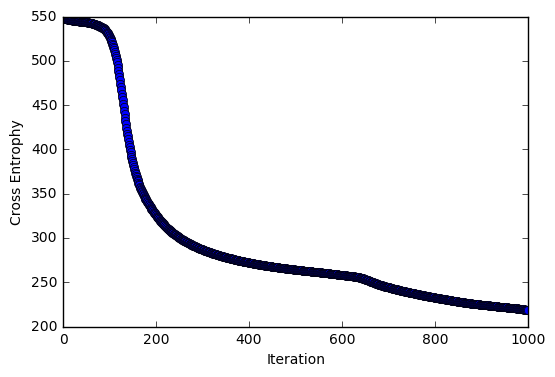

In [30]:
plt.plot(losses,'o')
plt.ylabel("Cross Entrophy")
plt.xlabel("Iteration")

### Part e

In [31]:
losses,errors = run_model(X,Y,cl, iterations = 1000,
              regularization_include = True,
              momentum_include = True)


            ---- Iteration 0 ----
            Error rate : 0.6726907630522089
            Loss: 548.7705347656686
            

            ---- Iteration 50 ----
            Error rate : 0.6666666666666666
            Loss: 543.4736304339127
            

            ---- Iteration 100 ----
            Error rate : 0.37349397590361444
            Loss: 404.67805662988127
            

            ---- Iteration 150 ----
            Error rate : 0.2791164658634538
            Loss: 324.8675658551154
            

            ---- Iteration 200 ----
            Error rate : 0.2248995983935743
            Loss: 287.4350946793522
            

            ---- Iteration 250 ----
            Error rate : 0.1706827309236948
            Loss: 262.3423827471351
            

            ---- Iteration 300 ----
            Error rate : 0.14457831325301204
            Loss: 244.41749453961773
            

            ---- Iteration 350 ----
            Error rate : 0.13453815261044177
       

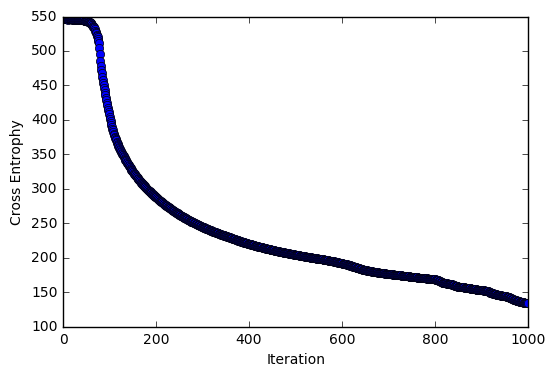

In [32]:
plt.plot(losses,'o')
plt.ylabel("Cross Entrophy")
plt.xlabel("Iteration")

It is obvious that using Momentum can make the algorithm to converge more efficiently. In the 1000th iteration, using Momentum can give us a Cross Entropy that is less than 150, while the Cross Entropy is greater than 200 without Momentum.